In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import pandas as pd

In [2]:
# reading and shuffling the data
difference = 0
df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values

myData = (df - df.min()) / (df.max() - df.min())

X = myData.iloc[:, :-1].to_numpy()
X1 = myData.iloc[:, 0:1].to_numpy() # strength
X2 = myData.iloc[:, 1:2].to_numpy() # temperature
Y = myData.iloc[:, -1:].to_numpy()

In [4]:
# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_X1, test_X1, train_X2, test_X2, train_Y, test_Y = X[:splitData], X[splitData:], X1[:splitData], X1[splitData:], X2[:splitData], X2[splitData:], Y[:splitData], Y[splitData:]

In [5]:
#setting parameters of the model

maxDegGD = 9
maxDegSGD = 9
iter_value = 20
iter_value += 1
skip_num = 5
iter_scaled= int(((iter_value-1)/skip_num)+1)

lamdaCountGD = 3
lamdaCountSGD = 3
lamdaCountGD += 1
lamdaCountSGD += 1

lamdaSegmentGD = 50
lamdaSegmentSGD = 50

learningRateGD = 0.1
learningRateSGD = 0.1

coeff_list_GD = np.zeros((maxDegGD+1, lamdaCountGD + 1, maxDegGD+1, maxDegGD+1))
coeff_list_SGD = np.zeros((maxDegSGD+1, lamdaCountSGD + 1, maxDegSGD+1, maxDegSGD+1))

error_array_GD = np.zeros((maxDegGD+1, lamdaCountGD + 1, iter_scaled))
error_array_SGD = np.zeros((maxDegSGD+1, lamdaCountSGD + 1, iter_scaled))

In [6]:
def Ridge_GD(deg, X1, X2, Y, lamda, learning_rate, iterations):
    
    # assigning random values for weights
    lamdaScaled = int(lamda*lamdaSegmentGD)
    
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
        for n in range(deg+1-m):
            A[m][n] = np.random.randn()
                
    for itr in range(iterations):
        sumItrError = 0
        sum_coeff = 0
        sum_coeff_square = 0
        eachIFErrorList = []
        
        for m in range(deg+1):
            for n in range(deg+1-m):
                sum_coeff += A[m][n]
                sum_coeff_square += A[m][n]**2

        for z in range(len(Y)):    # for each row in input data
            row1 = X1[z]              # contains strength, temperature
            row2 = X2[z]
            column = Y[z]       # contains pressure
            eachIFError = 0                # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    eachIFError += A[m][n]*(row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            eachIFError -= column                    # (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn 
            eachIFErrorList.append(eachIFError)
            sumItrError +=  (eachIFError**2)*0.5              

        sumItrError += (lamda/2) * sum_coeff_square
        sumItrError = (sumItrError/len(Y))**0.5
        
        for m in range(deg+1):
            for n in range(deg+1-m): 
                subSum = 0
                for z in range(len(Y)):
                    row1 = X1[z]
                    row2 = X2[z]
                    subSum += eachIFErrorList[z] * (row1**m) * (row2**n)
                A[m][n] -= (learning_rate/len(Y))  * (subSum + lamda * sum_coeff)

        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array_GD[deg][lamdaScaled][index] = sumItrError
            print("Error of ", itr ," iteration = " ,sumItrError)


        if(itr == iterations - 1): 
            print("\nError of end of iteration for lamda = ", lamda, "\n\t\t\t = " ,sumItrError)   
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):
                    coeff_list_GD[deg][(lamdaScaled)][m][n] = A[m][n]
    return sumItrError


ERRORS FOR LAMDA =  0.02 

Error of  0  iteration =  [0.91551115]
Error of  5  iteration =  [0.70055555]
Error of  10  iteration =  [0.56114012]
Error of  15  iteration =  [0.4721853]
Error of  20  iteration =  [0.41595972]

Error of end of iteration for lamda =  0.02 
			 =  [0.41595972]


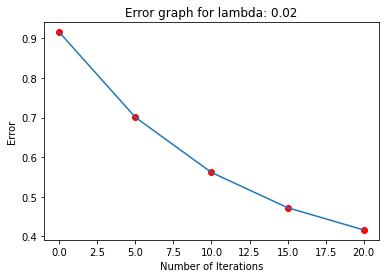


ERRORS FOR LAMDA =  0.04 

Error of  0  iteration =  [1.05778803]
Error of  5  iteration =  [0.78156273]
Error of  10  iteration =  [0.60871284]
Error of  15  iteration =  [0.49785913]
Error of  20  iteration =  [0.42841483]

Error of end of iteration for lamda =  0.04 
			 =  [0.42841483]


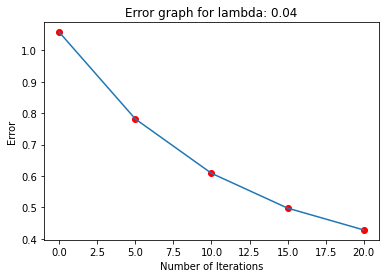


ERRORS FOR LAMDA =  0.06 

Error of  0  iteration =  [0.39898975]
Error of  5  iteration =  [0.33495523]
Error of  10  iteration =  [0.2953979]
Error of  15  iteration =  [0.27027529]
Error of  20  iteration =  [0.25363494]

Error of end of iteration for lamda =  0.06 
			 =  [0.25363494]


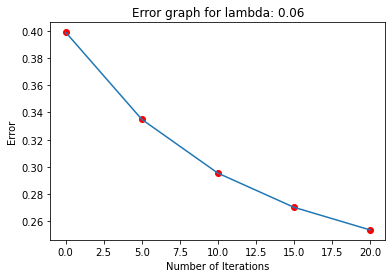

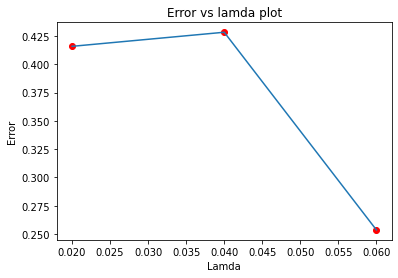


Lamda =  0.06  gives minimum error.


In [7]:
#For training data

minError = 100000
minErrorDeg = -1
minErrorLamda = -1
x_axis_GD=[]
lamdaGD = []
lamdaErrorList = []

for i in range(lamdaCountGD):
    if i == 0:
        continue
    lamdaGD.append(i/lamdaSegmentGD)

for iterLamda in lamdaGD:
    
    lamdaScaled = int(iterLamda*lamdaSegmentGD)
    
    x_axis_GD=[]
    
    for i in range(iter_scaled):
        x_axis_GD.append(i*skip_num)
        
    for i in range(maxDegGD+1):
        if(i != maxDegGD):
            continue
        print("\nERRORS FOR LAMDA = ", iterLamda, "\n")
        GD_Error = Ridge_GD(i, train_X1, train_X2, train_Y, iterLamda, learningRateGD , iter_value)
        lamdaErrorList.append(GD_Error)
        if(GD_Error <= minError):
            minError = GD_Error
            minErrorLamda = iterLamda

        error_list = error_array_GD[i][lamdaScaled].tolist()    #dont forget [lamda]
        
        plt.plot(x_axis_GD, error_list)
        plt.scatter(x_axis_GD, error_list, marker='o', color='red')
        plt.xlabel('Number of Iterations')
        plt.ylabel('Error')
        title = "Error graph for lambda: " + str(iterLamda)
        plt.title(title)
        plt.show()
        error_list=error_array_GD[i][lamdaScaled].tolist()

plt.plot(lamdaGD, lamdaErrorList)
plt.scatter(lamdaGD, lamdaErrorList, marker='o', color='red')
plt.xlabel('Lamda')
plt.ylabel('Error')
title = "Error vs lamda plot"
plt.title(title)
plt.show()
print("\nLamda = ", minErrorLamda, " gives minimum error.")  

In [8]:
def Predict_Ridge_GD(deg, X1, X2, Y, lamda):
    
    lamdaScaled = int(lamda*lamdaSegmentGD)
    sum_coeff_square = 0
    totalTestingError = 0
    
    for m in range(deg+1):
        for n in range(deg+1-m):
            sum_coeff_square += coeff_list_GD[deg][lamdaScaled][m][n]**2
    
    for z in range(len(Y)):    # for each row in input data
        row1 = X1[z]                  # contains strength
        row2 = X2[z]                 # contains temperature
        column = Y[z]              # contains pressure
        testingError = 0
                        
        for m in range(deg+1):                    # power of x1
            for n in range(deg+1-m):            # power of x2
                testingError += coeff_list_GD[deg][lamdaScaled][m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
        testingError -= column                       # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)     
        totalTestingError +=  (testingError**2)*0.5  
    totalTestingError +=  lamda * sum_coeff_square * 0.5 
    totalTestingError = (totalTestingError/len(Y))**0.5
    
    print("Testing error = " ,totalTestingError, "\n")
            
    return totalTestingError

TESTING ERRORS FOR LAMDA =  0.02
Testing error =  [0.41276236] 

TESTING ERRORS FOR LAMDA =  0.04
Testing error =  [0.42445177] 

TESTING ERRORS FOR LAMDA =  0.06
Testing error =  [0.24579216] 



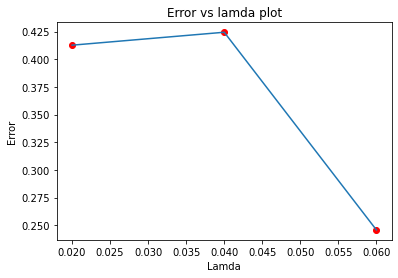


Lamda =  0.06  gives minimum error.


In [9]:
lamdaErrorList.clear()
for iterLamda in lamdaGD:
    for i in range(maxDegGD+1):
        if(i != maxDegGD):
            continue
        print("TESTING ERRORS FOR LAMDA = ", iterLamda)
        GD_Error = Predict_Ridge_GD(i, test_X1, test_X2, test_Y, iterLamda)
        lamdaErrorList.append(GD_Error)
        if(GD_Error < minError):
            minError = GD_Error
            minErrorLamda = iterLamda

plt.plot(lamdaGD, lamdaErrorList)
plt.scatter(lamdaGD, lamdaErrorList, marker='o', color='red')
plt.xlabel('Lamda')
plt.ylabel('Error')
title = "Error vs lamda plot"
plt.title(title)
plt.show()        
print("\nLamda = ", minErrorLamda, " gives minimum error.")  

In [10]:
def Ridge_SGD(deg, X1, X2, Y, lamda, learning_rate, iterations):
    
    lamdaScaled = int(lamda*lamdaSegmentSGD)
    # assigning random values for weights
    
    A = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
            for n in range(deg+1-m):
                A[m][n] = np.random.randn()
                
    for itr in range(iterations):
        sum_coeff = 0
        sum_coeff_square = 0
        
        for m in range(deg+1):
            for n in range(deg+1-m):
                sum_coeff += A[m][n]
                sum_coeff_square += A[m][n]**2
            
        sumItrError = 0
        
        for z in range(len(Y)):    # for each row in input data
            row1 = X1[z]              # contains strength, temperature
            row2 = X2[z]
            column = Y[z]       # contains pressure
            
            dotP_wx = 0                # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += A[m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column                    # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) 
            
            # for each parameter(w0,w1,w2,...)    
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):             # power of x2
                    A[m][n] -= (learning_rate/len(Y)) * (dotP_wx * (row1**m) * (row2**n) + lamda * sum_coeff) # calculating w0,w1,w2,... for each iteration
        
        for z in range(len(Y)):    # for each row in input data
            row1 = X1[z]              # contains strength, temperature
            row2 = X2[z]
            column = Y[z]
            dotP_wx = 0                # variable for calculating error in each iteration
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dotP_wx += A[m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dotP_wx -= column                   # Summation of [(w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn]
            sumItrError +=  (dotP_wx**2)*0.5
            
        sumItrError =  (sumItrError + lamda * sum_coeff_square*0.5)
        sumItrError = (sumItrError/len(Y))**0.5
        
        
        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array_SGD[deg][lamdaScaled][index] = sumItrError
            print("Error of ", itr ," iteration = " ,sumItrError)
        
        if(itr == iterations - 1):
            print("\nError of last iteration for lamda = ", lamda, " \n\t\t\t = " ,sumItrError)
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):
                    coeff_list_SGD[deg][lamdaScaled][m][n] = A[m][n]
    return sumItrError


ERRORS FOR LAMDA =  0.02 

Error of  0  iteration =  [1.32107519]
Error of  5  iteration =  [0.59729961]
Error of  10  iteration =  [0.55543382]
Error of  15  iteration =  [0.53310619]
Error of  20  iteration =  [0.51295117]

Error of last iteration for lamda =  0.02  
			 =  [0.51295117]


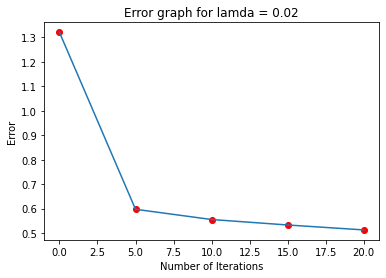


ERRORS FOR LAMDA =  0.04 

Error of  0  iteration =  [0.38773718]
Error of  5  iteration =  [0.32904936]
Error of  10  iteration =  [0.27405427]
Error of  15  iteration =  [0.24561312]
Error of  20  iteration =  [0.23193269]

Error of last iteration for lamda =  0.04  
			 =  [0.23193269]


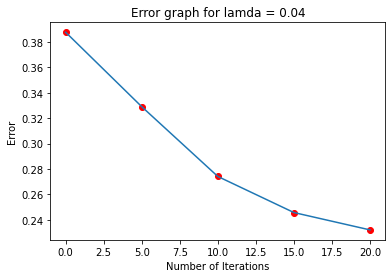


ERRORS FOR LAMDA =  0.06 

Error of  0  iteration =  [1.21528271]
Error of  5  iteration =  [0.66736911]
Error of  10  iteration =  [0.60212494]
Error of  15  iteration =  [0.55066713]
Error of  20  iteration =  [0.50747607]

Error of last iteration for lamda =  0.06  
			 =  [0.50747607]


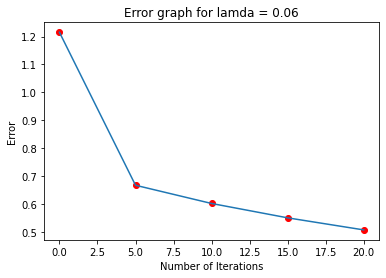

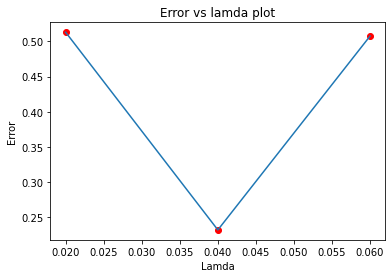


Lamda =  0.04  gives minimum error.


In [11]:
# For training data
minError = 100000
minErrorDeg = -1
x_axis_SGD=[]

lamdaSGD = []
lamdaErrorList.clear()

for i in range(lamdaCountSGD):
    if i == 0:
        continue
    lamdaSGD.append(i/lamdaSegmentSGD)
    
    
for i in range(iter_scaled):
    x_axis_SGD.append(i*skip_num)

for iterLamda in lamdaSGD:
    
    lamdaScaled = int(iterLamda*lamdaSegmentSGD)

    for i in range(maxDegSGD+1):
        if i != maxDegSGD:
            continue
        print("\nERRORS FOR LAMDA = ", iterLamda, "\n")

        SGD_Error = Ridge_SGD(i, X1, X2, train_Y, iterLamda, learningRateSGD, iter_value)
        lamdaErrorList.append(SGD_Error)
        if(SGD_Error <= minError):
            minError = SGD_Error
            minErrorLamda = iterLamda
            
        error_list = error_array_SGD[i][lamdaScaled].tolist() 
        plt.plot(x_axis_SGD, error_list)
        plt.scatter(x_axis_SGD, error_list, marker='o', color='red')
        plt.xlabel('Number of Iterations')
        plt.ylabel('Error')
        title = "Error graph for lamda = " + str(iterLamda)
        plt.title(title)
        plt.show()

plt.plot(lamdaSGD, lamdaErrorList)
plt.scatter(lamdaSGD, lamdaErrorList, marker='o', color='red')
plt.xlabel('Lamda')
plt.ylabel('Error')
title = "Error vs lamda plot"
plt.title(title)
plt.show()
print("\nLamda = ", minErrorLamda, " gives minimum error.")          

In [12]:
def Predict_Ridge_SGD(deg, X1, X2, Y, lamda):
    
    lamdaScaled = int(lamda*lamdaSegmentSGD)
    sum_coeff_square = 0
    totalTestingError = 0
    
    for m in range(deg+1):
        for n in range(deg+1-m):
            sum_coeff_square += coeff_list_SGD[deg][lamdaScaled][m][n]**2
    
    for z in range(len(Y)):    # for each row in input data
        row1 = X1[z]                  # contains strength
        row2 = X2[z]                 # contains temperature
        column = Y[z]              # contains pressure
        testingError = 0
                        
        for m in range(deg+1):                    # power of x1
            for n in range(deg+1-m):            # power of x2
                testingError += coeff_list_SGD[deg][lamdaScaled][m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
        testingError -= column                       # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)     
        totalTestingError +=  (testingError**2)*0.5  
    totalTestingError +=  lamda * sum_coeff_square * 0.5      
    totalTestingError = (totalTestingError/len(Y))**0.5
    
    print("Testing error = " ,totalTestingError, "\n")
            
    return totalTestingError

TESTING ERROR FOR LAMDA =  0.02
Testing error =  [0.53212679] 

TESTING ERROR FOR LAMDA =  0.04
Testing error =  [0.22261962] 

TESTING ERROR FOR LAMDA =  0.06
Testing error =  [0.49462334] 



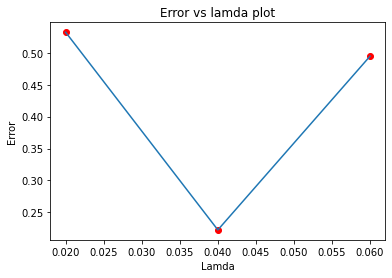


Lamda =  0.04  gives minimum error.


In [13]:
lamdaErrorList.clear()

for iterLamda in lamdaSGD:    
    for i in range(maxDegSGD+1):
        if(i != maxDegSGD):
            continue
        print("TESTING ERROR FOR LAMDA = ", iterLamda)
        SGD_Error = Predict_Ridge_SGD(i, test_X1, test_X2, test_Y, iterLamda)
        lamdaErrorList.append(SGD_Error)
        if(SGD_Error < minError):
            minError = SGD_Error
            minErrorLamda = iterLamda

plt.plot(lamdaSGD, lamdaErrorList)
plt.scatter(lamdaSGD, lamdaErrorList, marker='o', color='red')
plt.xlabel('Lamda')
plt.ylabel('Error')
title = "Error vs lamda plot"
plt.title(title)
plt.show()
print("\nLamda = ", minErrorLamda, " gives minimum error.")  